In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

customers_df = pd.read_csv('/kaggle/input/customers/Customers.csv')
products_df = pd.read_csv('/kaggle/input/products/Products.csv')
transactions_df = pd.read_csv('/kaggle/input/transactions/Transactions.csv')

customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'], errors='coerce')
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'], errors='coerce')

# Merging dataframes on CustomerID and ProductID
merged_df = pd.merge(transactions_df, customers_df, on="CustomerID", how="left")
merged_df = pd.merge(merged_df, products_df, on="ProductID", how="left")

# Check for any missing or unmatched data after merge
print(merged_df.isna().sum())

# Check a sample of merged dataframe to confirm if dates are correct
print(merged_df[['TransactionDate', 'SignupDate']].head())


TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64
      TransactionDate SignupDate
0 2024-08-25 12:38:23 2022-12-03
1 2024-05-27 22:23:54 2024-09-04
2 2024-04-25 07:38:55 2024-04-04
3 2024-03-26 22:55:37 2024-04-11
4 2024-03-21 15:10:10 2022-03-15


<Figure size 1400x700 with 0 Axes>

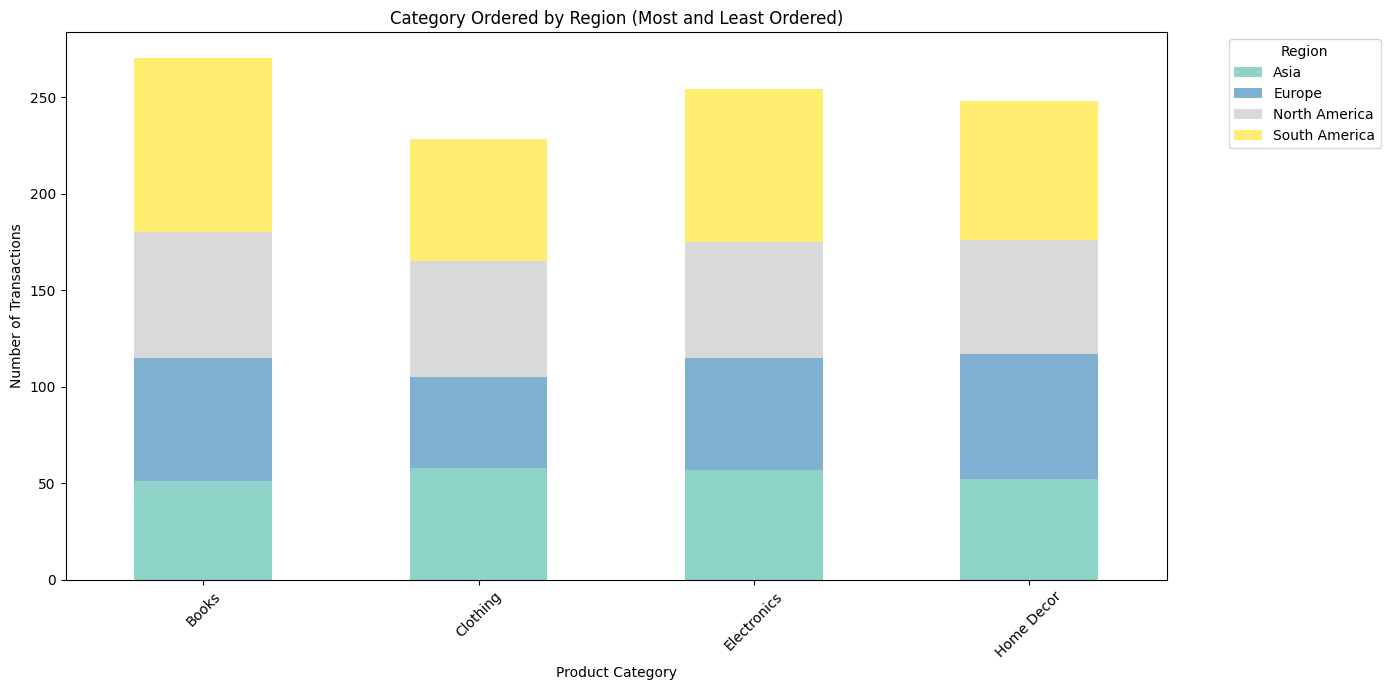

In [4]:
# 1. Category versus Region Analysis: Which category was ordered the most and least by a region
category_region = merged_df.groupby(['Category', 'Region']).size().unstack().fillna(0)

# Plot stacked bar chart
plt.figure(figsize=(14, 7))
category_region.plot(kind='bar', stacked=True, colormap='Set3', figsize=(14,7))
plt.title('Category Ordered by Region (Most and Least Ordered)')
plt.ylabel('Number of Transactions')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

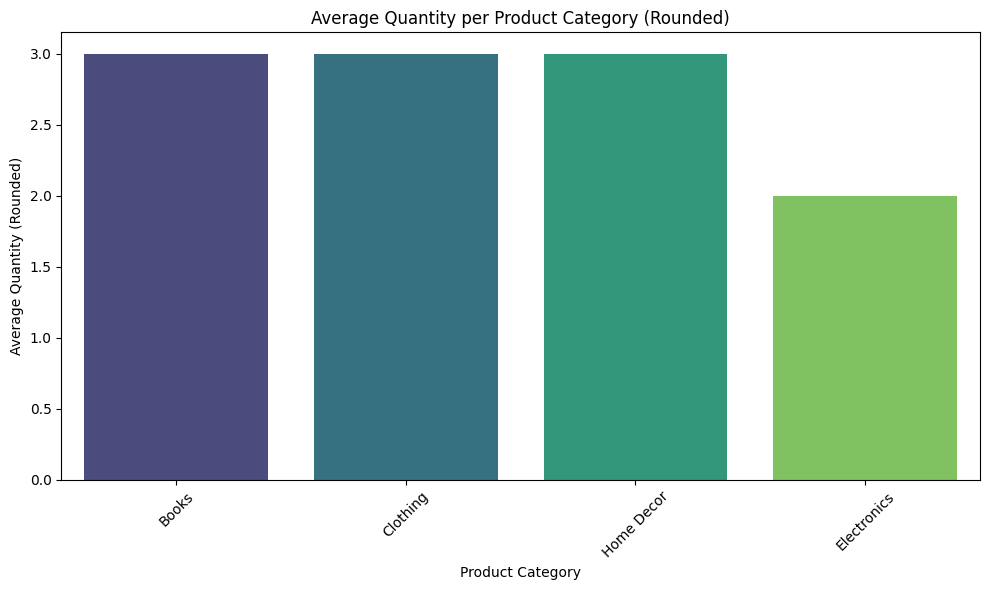

In [5]:
# 2. Category versus Average Quantity: Rounded off to closest integer
category_quantity = merged_df.groupby('Category')['Quantity'].mean().round().sort_values(ascending=False)

# Plot bar chart for average quantity
plt.figure(figsize=(10,6))
sns.barplot(x=category_quantity.index, y=category_quantity.values, palette='viridis')
plt.title('Average Quantity per Product Category (Rounded)')
plt.xlabel('Product Category')
plt.ylabel('Average Quantity (Rounded)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-6-658abf193093>:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x=region_total_value.index, y=region_total_value.values, palette='coolwarm', size=10, jitter=True)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this

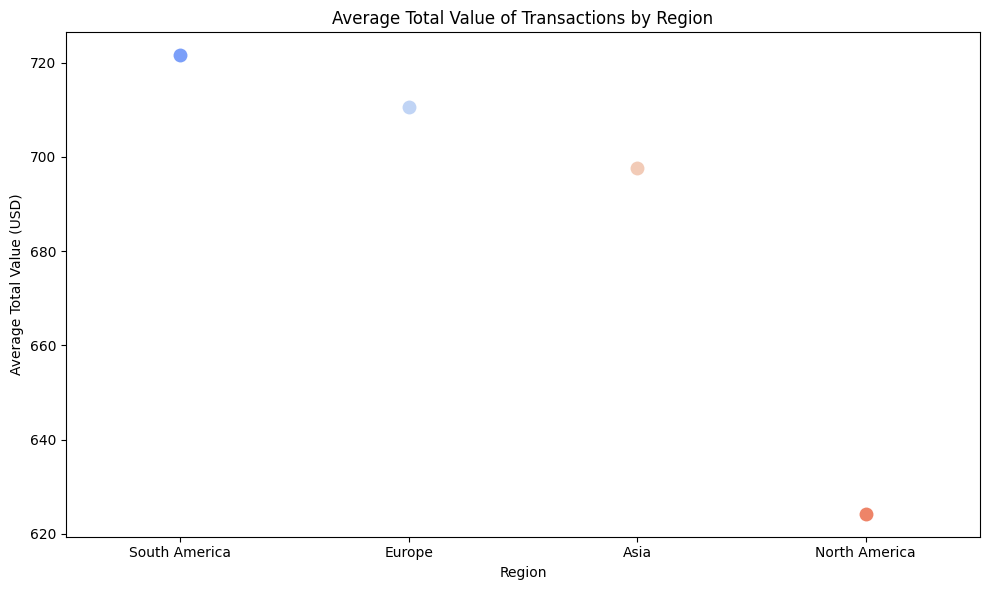

In [6]:
# 3. Region vs Average Total Value: More precise using a heatmap or dot plot
region_total_value = merged_df.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)

# Dot plot for better precision
plt.figure(figsize=(10,6))
sns.stripplot(x=region_total_value.index, y=region_total_value.values, palette='coolwarm', size=10, jitter=True)
plt.title('Average Total Value of Transactions by Region')
plt.xlabel('Region')
plt.ylabel('Average Total Value (USD)')
plt.tight_layout()
plt.show()

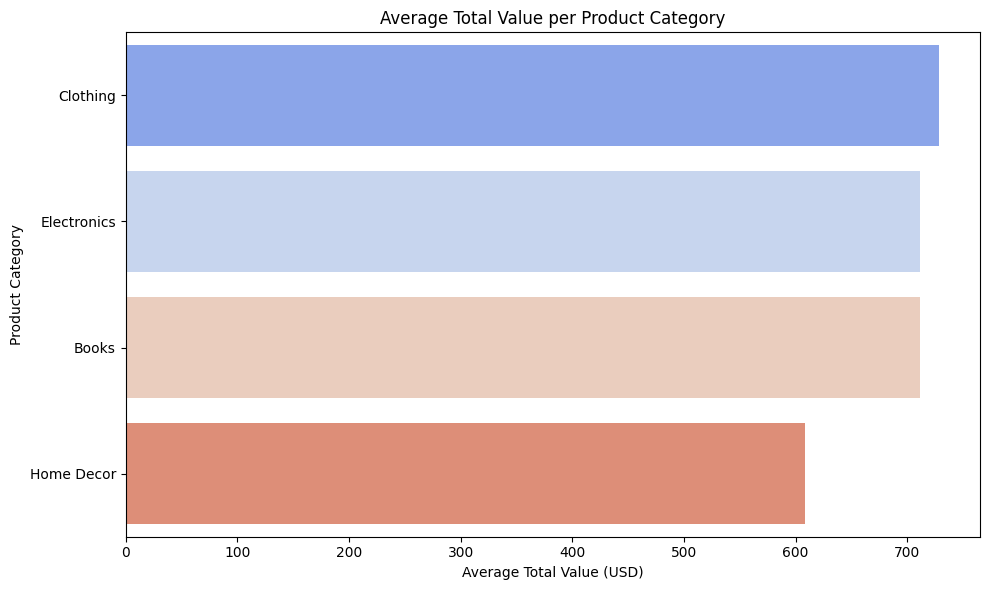

In [7]:
# 4. Category vs Average Total Value: Horizontal bar plot for clarity
category_total_value = merged_df.groupby('Category')['TotalValue'].mean().sort_values(ascending=False)

# Plot horizontal bar chart for average total value per category
plt.figure(figsize=(10,6))
sns.barplot(x=category_total_value.values, y=category_total_value.index, palette='coolwarm')
plt.title('Average Total Value per Product Category')
plt.xlabel('Average Total Value (USD)')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()


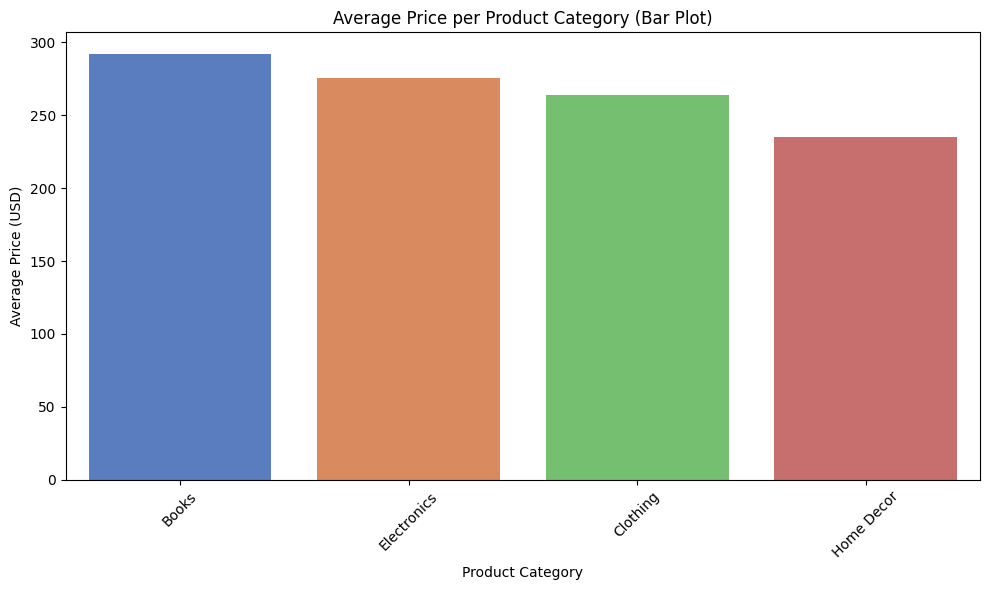

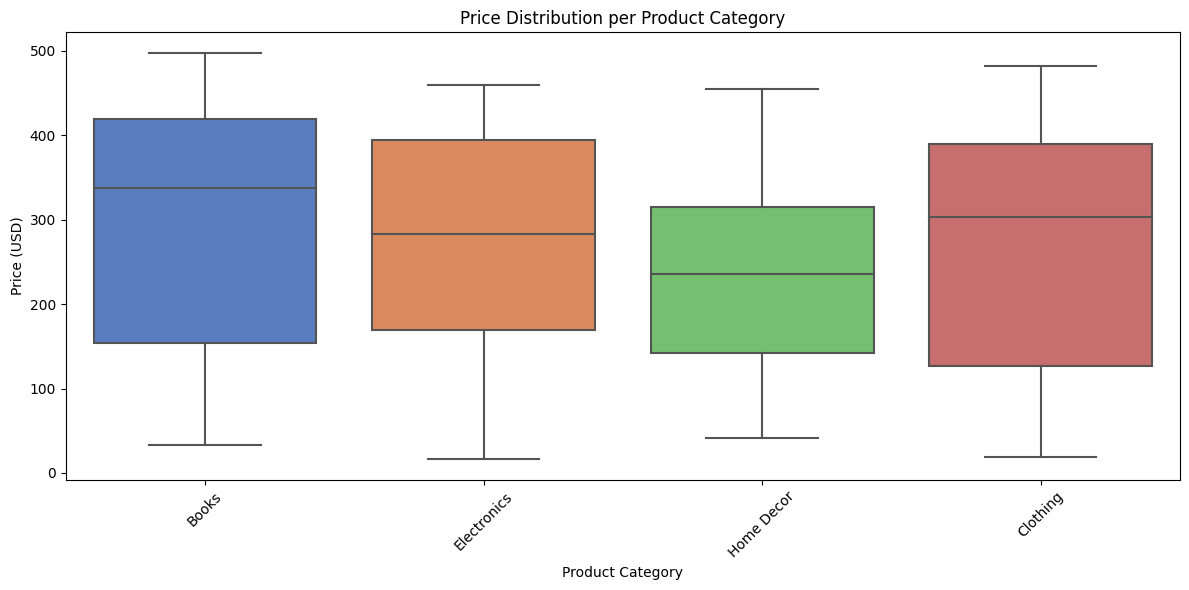

In [8]:
# 5. Category vs Average Price: Multiple visualizations for insights
# Use the 'Price' column from the 'products_df' dataset
category_price = products_df.groupby('Category')['Price'].mean().sort_values(ascending=False)

# Plot bar chart for average price per category
plt.figure(figsize=(10,6))
sns.barplot(x=category_price.index, y=category_price.values, palette='muted')
plt.title('Average Price per Product Category (Bar Plot)')
plt.xlabel('Product Category')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boxplot for price distribution within each category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Price', data=products_df, palette='muted')
plt.title('Price Distribution per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# Category versus Region Analysis: Number of Transactions per Category by Region
category_region = merged_df.groupby(['Category', 'Region']).size().unstack().fillna(0)

# Display the number of transactions for each category by region
print("Number of Transactions per Category by Region:")
print(category_region)


Number of Transactions per Category by Region:
Region       Asia  Europe  North America  South America
Category                                               
Books          51      64             65             90
Clothing       58      47             60             63
Electronics    57      58             60             79
Home Decor     52      65             59             72


In [10]:
# Category versus Average Quantity (Rounded)
category_quantity = merged_df.groupby('Category')['Quantity'].mean().round().sort_values(ascending=False)

# Display the average quantity per category (rounded)
print("\nAverage Quantity per Product Category (Rounded):")
print(category_quantity)



Average Quantity per Product Category (Rounded):
Category
Books          3.0
Clothing       3.0
Home Decor     3.0
Electronics    2.0
Name: Quantity, dtype: float64


In [11]:
# Region versus Average Total Value
region_total_value = merged_df.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)

# Display the average total value per region
print("\nAverage Total Value of Transactions by Region:")
print(region_total_value)



Average Total Value of Transactions by Region:
Region
South America    721.554474
Europe           710.489872
Asia             697.591606
North America    624.235246
Name: TotalValue, dtype: float64


In [12]:
# Category versus Average Total Value
category_total_value = merged_df.groupby('Category')['TotalValue'].mean().sort_values(ascending=False)

# Display the average total value per category
print("\nAverage Total Value per Product Category:")
print(category_total_value)



Average Total Value per Product Category:
Category
Clothing       728.818684
Electronics    711.746063
Books          711.657296
Home Decor     608.443266
Name: TotalValue, dtype: float64


In [13]:
# Category versus Average Price
category_price = products_df.groupby('Category')['Price'].mean().sort_values(ascending=False)

# Display the average price per category
print("\nAverage Price per Product Category:")
print(category_price)



Average Price per Product Category:
Category
Books          292.212308
Electronics    275.353462
Clothing       263.720000
Home Decor     235.020000
Name: Price, dtype: float64


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Merging dataframes on CustomerID and ProductID
merged_df = pd.merge(transactions_df, customers_df, on="CustomerID", how="left")
merged_df = pd.merge(merged_df, products_df, on="ProductID", how="left")

# 1. Category vs Region Analysis: Number of Transactions per Category by Region
category_region = merged_df.groupby(['Category', 'Region']).size().unstack().fillna(0)
print("Number of Transactions per Category by Region:")
print(category_region)

# 2. Category vs Average Quantity (Rounded)
category_quantity = merged_df.groupby('Category')['Quantity'].mean().round().sort_values(ascending=False)
print("\nAverage Quantity per Product Category (Rounded):")
print(category_quantity)

# 3. Region vs Average Total Value
region_total_value = merged_df.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)
print("\nAverage Total Value of Transactions by Region:")
print(region_total_value)

# 4. Category vs Average Total Value
category_total_value = merged_df.groupby('Category')['TotalValue'].mean().sort_values(ascending=False)
print("\nAverage Total Value per Product Category:")
print(category_total_value)

# 5. Category vs Average Price
category_price = products_df.groupby('Category')['Price'].mean().sort_values(ascending=False)
print("\nAverage Price per Product Category:")
print(category_price)


Number of Transactions per Category by Region:
Region       Asia  Europe  North America  South America
Category                                               
Books          51      64             65             90
Clothing       58      47             60             63
Electronics    57      58             60             79
Home Decor     52      65             59             72

Average Quantity per Product Category (Rounded):
Category
Books          3.0
Clothing       3.0
Home Decor     3.0
Electronics    2.0
Name: Quantity, dtype: float64

Average Total Value of Transactions by Region:
Region
South America    721.554474
Europe           710.489872
Asia             697.591606
North America    624.235246
Name: TotalValue, dtype: float64

Average Total Value per Product Category:
Category
Clothing       728.818684
Electronics    711.746063
Books          711.657296
Home Decor     608.443266
Name: TotalValue, dtype: float64

Average Price per Product Category:
Category
Books          2